In [1]:
# Script Name: EDA Analysis on the Datasets
# Author: Rahul Kumar
# Date: 11/3/22
# Description: Gain some insights on the dataset

import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

# This actually sets the pandas display to show all rows and columns 
# when you are showing a dataframe, without skipping the center
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# sns.set_palette("Set3")
sns.set_theme()

In [2]:
# Strings for using in writing of files

filepath = '../../UNSW-PROJECT-DATA/' # If you want to run the code, change the file path to where you store the files. This reference
                                # is to where I store the files outside the github clone
# filepath = '../data/UNSW-PROJECT-DATA/'    
images = 'images/' #My folder specific image folder

csv = '.csv'
xlsx = '.xlsx'

In [3]:
# c_file = 'combined'
# c_file = 'combined_fd_Avg'
c_file = 'demand_pv_temp_forecast_timefeatures_hols'
t_file = 'temperature_cleaned_allstates_11042022'
#c_file = 'dataset_v1_0'

data = pd.read_csv(filepath+c_file+csv)
temp = pd.read_csv(filepath+t_file+csv)

# data = data.drop(data.columns[0], axis=1)

def day_type_cat(day_type):
    if day_type =='Day':
        return 0
    else:
        return 1


In [4]:
data.shape


(726195, 17)

In [5]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.00
DATETIME,0.00
TOTALDEMAND,0.00
POWER,70.74
LOCATION,0.00
TEMPERATURE,0.00
FORECASTDEMAND,42.46
Weekday,0.00
Quarter,0.00
Month,0.00


In [6]:
data.shape

(726195, 17)

In [7]:
data.info() # Date time objects arent date time objects

temp['DATETIME'] = pd.to_datetime(temp['DATETIME'])
temp = temp[['DATETIME','STATE','TEMPERATURE']]

data['DATETIME'] = pd.to_datetime(data['DATETIME'])
data['WeekDayNo'] = data['DATETIME'].dt.dayofweek
data['SUNRISE'] = pd.to_datetime(data['SUNRISE'])
data['SUNSET'] = pd.to_datetime(data['SUNSET'])
data['DAYTYPE_no'] = data['DAYTYPE'].apply(day_type_cat)

#adding month name
data['Month Name'] = data['DATETIME'].dt.month_name()


print('\n===================================================================================================\n')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726195 entries, 0 to 726194
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   STATE           726195 non-null  object 
 1   DATETIME        726195 non-null  object 
 2   TOTALDEMAND     726195 non-null  float64
 3   POWER           212514 non-null  float64
 4   LOCATION        726195 non-null  object 
 5   TEMPERATURE     726183 non-null  float64
 6   FORECASTDEMAND  417844 non-null  float64
 7   Weekday         726195 non-null  object 
 8   Quarter         726195 non-null  int64  
 9   Month           726195 non-null  int64  
 10  Season          726195 non-null  object 
 11  Day             726195 non-null  int64  
 12  Year            726195 non-null  int64  
 13  SUNRISE         726195 non-null  object 
 14  SUNSET          726195 non-null  object 
 15  DAYTYPE         726195 non-null  object 
 16  HOLIDAY         726195 non-null  bool   
dtypes: bool(1)

In [8]:
merged = pd.merge(data, temp, left_on=['DATETIME','STATE'], right_on=['DATETIME','STATE'], how='left')

In [9]:
merged = merged.drop(columns=['TEMPERATURE_x'], axis=1)
merged = merged.rename(columns={'TEMPERATURE_y':'TEMPERATURE'})
data = merged

data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name,TEMPERATURE
0,NSW,2010-01-01 00:00:00,8038.00,NaN,Bankstown,7824.411831,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January,23.1
1,NSW,2010-01-01 00:30:00,7809.31,NaN,Bankstown,7680.510417,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January,22.9
2,NSW,2010-01-01 01:00:00,7483.69,NaN,Bankstown,7428.971370,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January,22.6
3,NSW,2010-01-01 01:30:00,7117.23,NaN,Bankstown,7084.802162,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January,22.5
4,NSW,2010-01-01 02:00:00,6812.03,NaN,Bankstown,6751.369600,Friday,1,1,Summer,1,2010,2010-01-01 04:48:00,2010-01-01 19:10:00,Night,True,4,1,January,22.5


In [10]:
# Set the main dataframe to only include dates in the analysis range
data = data[data['DATETIME'] > '20180401']
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name,TEMPERATURE
518448,SA,2018-04-01 00:30:00,1280.36,0.0,Adelaide (Kent Town),1282.589722,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,19.9
518449,SA,2018-04-01 01:00:00,1240.61,0.0,Adelaide (Kent Town),1224.835753,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.9
518450,SA,2018-04-01 01:30:00,1159.92,0.0,Adelaide (Kent Town),1138.812838,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,21.0
518451,SA,2018-04-01 02:00:00,1103.37,0.0,Adelaide (Kent Town),1102.078400,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.4
518452,SA,2018-04-01 02:30:00,1092.04,0.0,Adelaide (Kent Town),1071.104868,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.1


In [11]:
data.describe()

,TOTALDEMAND,POWER,FORECASTDEMAND,Quarter,Month,Day,Year,WeekDayNo,DAYTYPE_no,TEMPERATURE
count,207744.000000,207712.000000,207744.000000,207744.000000,207744.000000,207744.000000,207744.000000,207744.000000,207744.000000,207740.000000
mean,5033.715186,316.420643,5024.043060,2.527707,6.567448,15.619551,2019.224642,2.997170,0.494214,18.496956
std,2575.107694,481.218123,2572.492459,1.111076,3.447757,8.788919,0.907183,2.001576,0.499968,6.149745
min,284.510000,0.000000,191.467609,1.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,-1.300000
25%,2838.815000,0.000000,2866.324042,2.000000,4.000000,8.000000,2018.000000,1.000000,0.000000,13.900000
50%,5411.605000,3.957000,5413.499167,3.000000,7.000000,16.000000,2019.000000,3.000000,0.000000,18.600000
75%,6892.192500,530.134750,6880.313333,4.000000,10.000000,23.000000,2020.000000,5.000000,1.000000,22.900000
max,13700.900000,2565.377000,13920.397679,4.000000,12.000000,31.000000,2021.000000,6.000000,1.000000,44.700000


In [12]:
tdata = data
data.isnull().sum()


STATE              0
DATETIME           0
TOTALDEMAND        0
POWER             32
LOCATION           0
FORECASTDEMAND     0
Weekday            0
Quarter            0
Month              0
Season             0
Day                0
Year               0
SUNRISE            0
SUNSET             0
DAYTYPE            0
HOLIDAY            0
WeekDayNo          0
DAYTYPE_no         0
Month Name         0
TEMPERATURE        4
dtype: int64

In [13]:
data.shape

(207744, 20)

In [14]:
data.nunique()

STATE                  4
DATETIME           51936
TOTALDEMAND       177130
POWER             102263
LOCATION               4
FORECASTDEMAND    207715
Weekday                7
Quarter                4
Month                 12
Season                 4
Day                   31
Year                   4
SUNRISE             4303
SUNSET              4306
DAYTYPE                2
HOLIDAY                2
WeekDayNo              7
DAYTYPE_no             2
Month Name            12
TEMPERATURE          436
dtype: int64

In [15]:
data.columns

Index(['STATE', 'DATETIME', 'TOTALDEMAND', 'POWER', 'LOCATION',
       'FORECASTDEMAND', 'Weekday', 'Quarter', 'Month', 'Season', 'Day',
       'Year', 'SUNRISE', 'SUNSET', 'DAYTYPE', 'HOLIDAY', 'WeekDayNo',
       'DAYTYPE_no', 'Month Name', 'TEMPERATURE'],
      dtype='object')

In [16]:
data = data[data['POWER'].notna()]

In [17]:
data.isnull().sum()

STATE             0
DATETIME          0
TOTALDEMAND       0
POWER             0
LOCATION          0
FORECASTDEMAND    0
Weekday           0
Quarter           0
Month             0
Season            0
Day               0
Year              0
SUNRISE           0
SUNSET            0
DAYTYPE           0
HOLIDAY           0
WeekDayNo         0
DAYTYPE_no        0
Month Name        0
TEMPERATURE       4
dtype: int64

In [18]:
percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_value_df = pd.DataFrame({'% Missing': percent_missing})
missing_value_df

,% Missing
STATE,0.0
DATETIME,0.0
TOTALDEMAND,0.0
POWER,0.0
LOCATION,0.0
FORECASTDEMAND,0.0
Weekday,0.0
Quarter,0.0
Month,0.0
Season,0.0


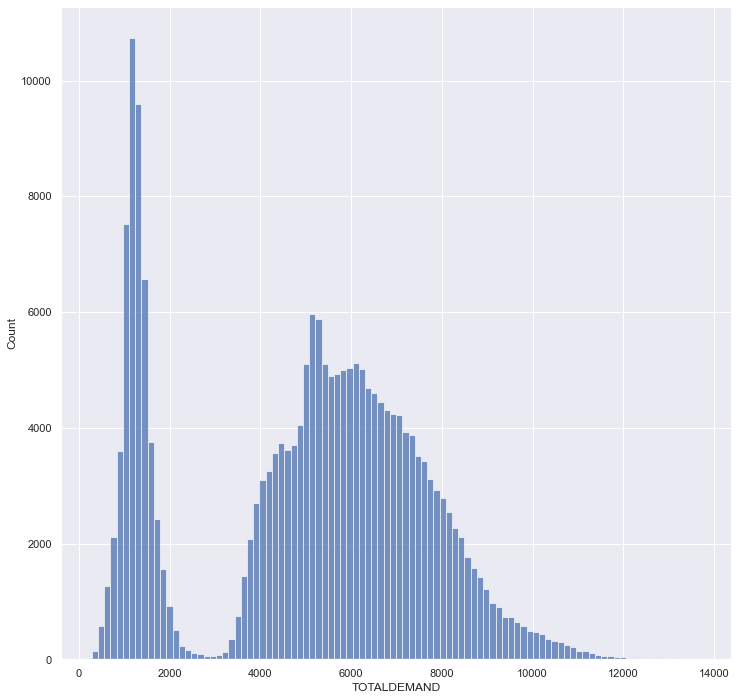

In [19]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TOTALDEMAND")
plt.show()

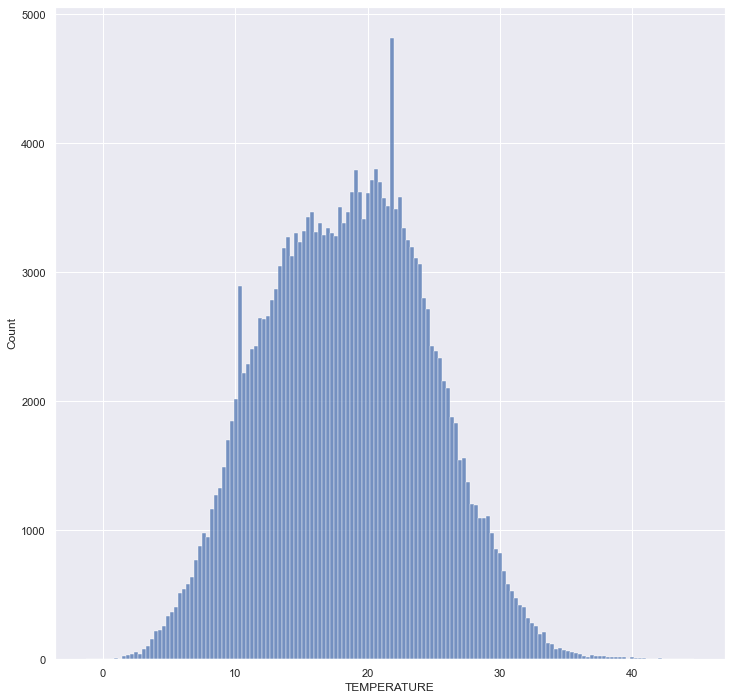

In [20]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="TEMPERATURE")
plt.show()

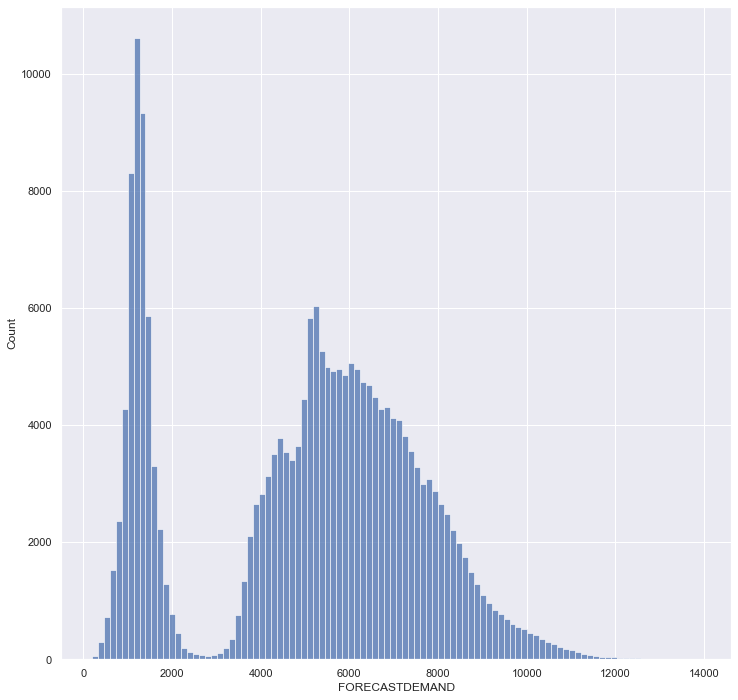

In [21]:
plt.figure(figsize=(12,12)) # this creates a figure 8 inch wide, 4 inch high
sns.histplot(data, x="FORECASTDEMAND")
plt.show()

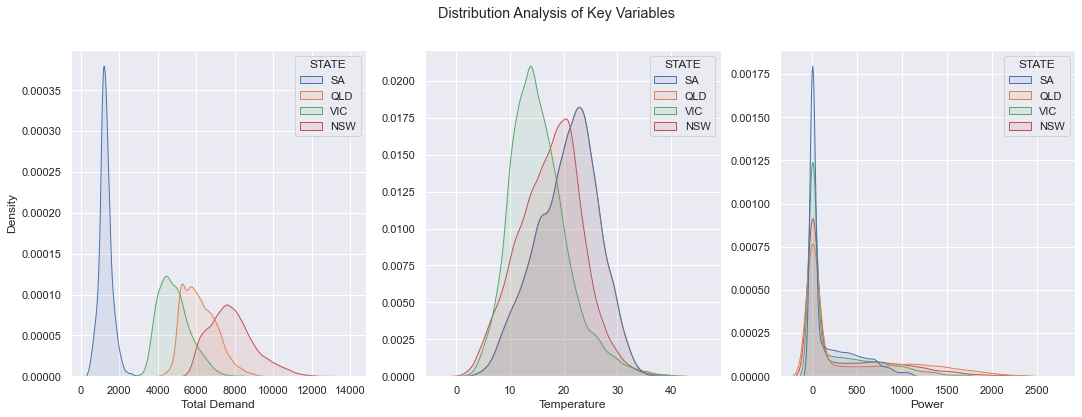

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution Analysis of Key Variables')

# Bulbasaur
sns.kdeplot(ax=axes[0],data=data, x='TOTALDEMAND', hue='STATE', fill=True, alpha=0.1)
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Total Demand')
axes[0].set_ylabel('Density')
# Charmander
sns.kdeplot(ax=axes[1],data=data, x='TEMPERATURE', hue='STATE', fill=True, alpha=0.1)
# axes[1].set_title("Test2")
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('')
# Squirtle
sns.kdeplot(ax=axes[2],data=data, x='POWER', hue='STATE', fill=True, alpha=0.1)
# axes[2].set_title("Test3")
axes[2].set_xlabel('Power')
axes[2].set_ylabel('')

# axes.set_ylabel('test2')

plt.savefig(images+'Distribution.png',bbox_inches='tight')

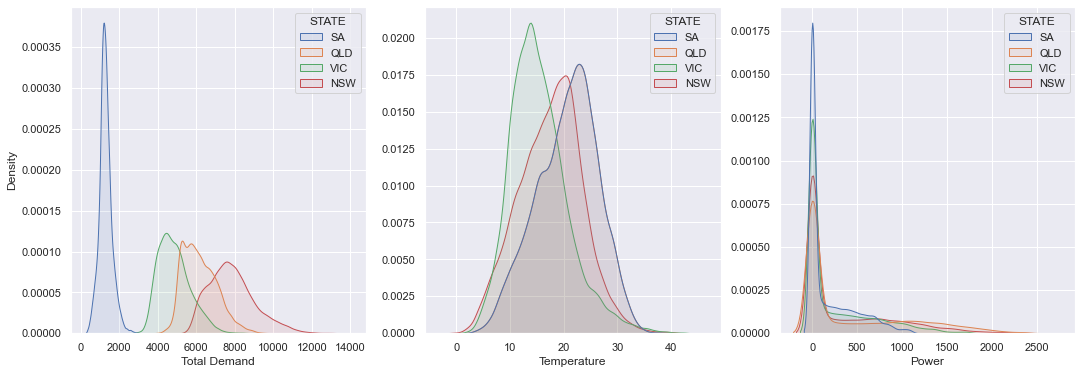

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# fig.suptitle('Distribution Analysis of Key Variables')

# Bulbasaur
sns.kdeplot(ax=axes[0],data=data, x='TOTALDEMAND', hue='STATE', fill=True, alpha=0.1)
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Total Demand')
axes[0].set_ylabel('Density')
# Charmander
sns.kdeplot(ax=axes[1],data=data, x='TEMPERATURE', hue='STATE', fill=True, alpha=0.1)
# axes[1].set_title("Test2")
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('')
# Squirtle
sns.kdeplot(ax=axes[2],data=data, x='POWER', hue='STATE', fill=True, alpha=0.1)
# axes[2].set_title("Test3")
axes[2].set_xlabel('Power')
axes[2].set_ylabel('')

# axes.set_ylabel('test2')

plt.savefig(images+'PresentDistribution.png',bbox_inches='tight')

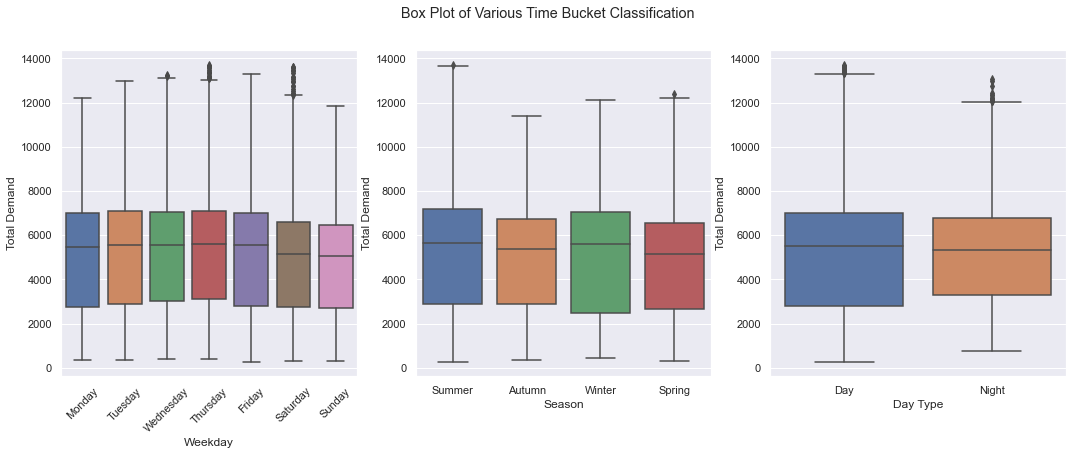

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plot of Various Time Bucket Classification')


sns.boxplot(ax=axes[0],data=data, x=data['Weekday'], y='TOTALDEMAND',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Weekday')
axes[0].set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)
axes[0].set_ylabel('Total Demand')


sns.boxplot(ax=axes[1],data=data, x=data['Season'], y='TOTALDEMAND',order=['Summer', 'Autumn', 'Winter', 'Spring'])
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Total Demand')


sns.boxplot(ax=axes[2],data=data,x=data['DAYTYPE'], y='TOTALDEMAND',order=['Day','Night'])
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[2].set_xlabel('Day Type')
axes[2].set_ylabel('Total Demand')

# axes.set_ylabel('test2')

plt.savefig(images+'BoxPlots.png',bbox_inches='tight')

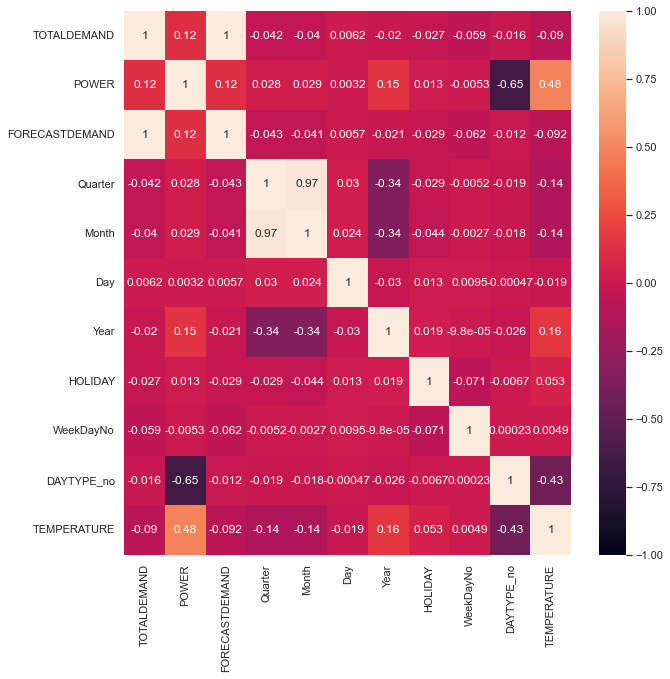

In [24]:
plt.figure(figsize=(10,10))
# mask = np.triu(np.ones_like(data.corr()))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig(images+'CorrelationHeatMap.png',bbox_inches='tight')
plt.show()

C:\Users\rahul\AppData\Local\Temp/ipykernel_13636/3428666106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['DATE'] = corr_data['Day']+corr_data['Month']+corr_data['Year']


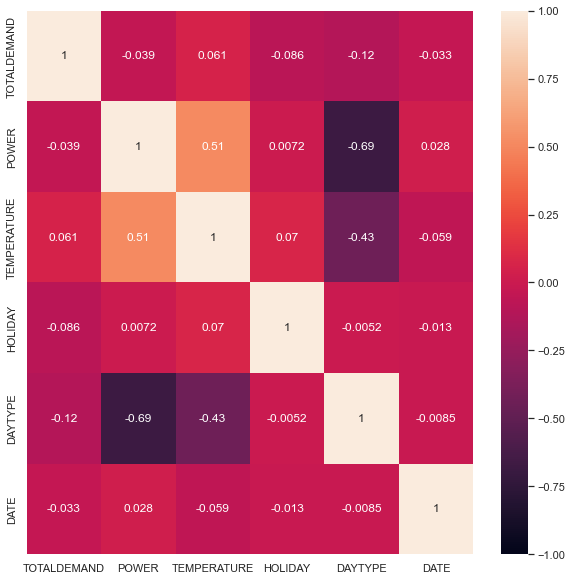

In [72]:
corr_data = data[['TOTALDEMAND','POWER','TEMPERATURE','HOLIDAY','DAYTYPE_no','Day','Month','Year', 'STATE']]
corr_data['DATE'] = corr_data['Day']+corr_data['Month']+corr_data['Year']

corr_data = corr_data.loc[corr_data['STATE'] == 'NSW']

corr_data.rename(columns={'DAYTYPE_no':'DAYTYPE'},inplace=True)

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr_data[['TOTALDEMAND','POWER','TEMPERATURE','HOLIDAY','DAYTYPE','DATE']].corr(), vmin=-1, vmax=1, annot=True)
plt.savefig(images+'CorrelationHeatMapSimple.png',bbox_inches='tight')

In [25]:
df = data[['STATE', 'DATETIME', 'TEMPERATURE', 'TOTALDEMAND', 'POWER', 'FORECASTDEMAND', 'Season','DAYTYPE','HOLIDAY']]
df['DATETIME'] = df["DATETIME"].dt.date
df.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_13636/3131639390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATETIME'] = df["DATETIME"].dt.date


,STATE,DATETIME,TEMPERATURE,TOTALDEMAND,POWER,FORECASTDEMAND,Season,DAYTYPE,HOLIDAY
518448,SA,2018-04-01,19.9,1280.36,0.0,1282.589722,Autumn,Night,False
518449,SA,2018-04-01,20.9,1240.61,0.0,1224.835753,Autumn,Night,False
518450,SA,2018-04-01,21.0,1159.92,0.0,1138.812838,Autumn,Night,False
518451,SA,2018-04-01,20.4,1103.37,0.0,1102.078400,Autumn,Night,False
518452,SA,2018-04-01,20.1,1092.04,0.0,1071.104868,Autumn,Night,False


In [26]:
df_day_temp = df.groupby(['STATE','DATETIME','Season','HOLIDAY']).mean().reset_index()
df_day_temp2 = df_day_temp[['STATE', 'DATETIME', 'TEMPERATURE']]
df_day_temp2.head()

mt = df.groupby(['DATETIME','STATE']).mean().reset_index()

In [27]:
mt[(mt['STATE'] == 'QLD') & (mt['TEMPERATURE'] < 15)]

,DATETIME,STATE,TEMPERATURE,TOTALDEMAND,POWER,FORECASTDEMAND,HOLIDAY
241,2018-05-31,QLD,14.502083,6193.083542,328.546125,6154.259140,0.0
245,2018-06-01,QLD,13.650000,6202.937708,331.819521,6227.497877,0.0
249,2018-06-02,QLD,14.004167,5879.922292,327.239625,5835.738315,0.0
261,2018-06-05,QLD,14.741667,6161.200417,305.317271,6212.992365,0.0
265,2018-06-06,QLD,14.916667,6249.000625,273.189979,6286.158294,0.0
285,2018-06-11,QLD,14.800000,6168.428333,302.466417,6166.835710,0.0
289,2018-06-12,QLD,14.454167,6272.713542,283.182708,6276.805828,0.0
305,2018-06-16,QLD,13.191667,5845.100208,296.627063,5790.492501,0.0
309,2018-06-17,QLD,12.566667,5882.788542,287.170396,5811.528650,0.0
313,2018-06-18,QLD,12.433333,6464.258333,324.991792,6429.859611,0.0


<AxesSubplot:xlabel='DATETIME', ylabel='TEMPERATURE'>

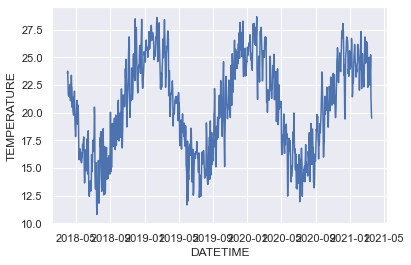

In [28]:
sns.lineplot(data=mt[mt['STATE'] == 'QLD'], x='DATETIME', y='TEMPERATURE')

In [29]:
df_day = df.groupby(['STATE','DATETIME','Season','HOLIDAY']).sum().reset_index()
df_day = df_day.drop(['TEMPERATURE'], axis=1)
df_day.head()

,STATE,DATETIME,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND
0,NSW,2018-04-01,Autumn,True,333125.71,11580.737,336339.742330
1,NSW,2018-04-02,Autumn,True,351877.15,9756.556,362228.415477
2,NSW,2018-04-03,Autumn,False,373863.26,8388.740,377242.581338
3,NSW,2018-04-04,Autumn,False,377322.48,10308.989,380761.820008
4,NSW,2018-04-05,Autumn,False,389764.39,11712.137,390572.764573


In [74]:
df_day2 = df_day.merge(df_day_temp2, left_on=['STATE','DATETIME'], right_on = ['STATE','DATETIME'],how = 'outer')
df_day2.head()
df_day2 = df_day2.rename(columns={'TEMPERATURE':'Average daily temperature (C)'})

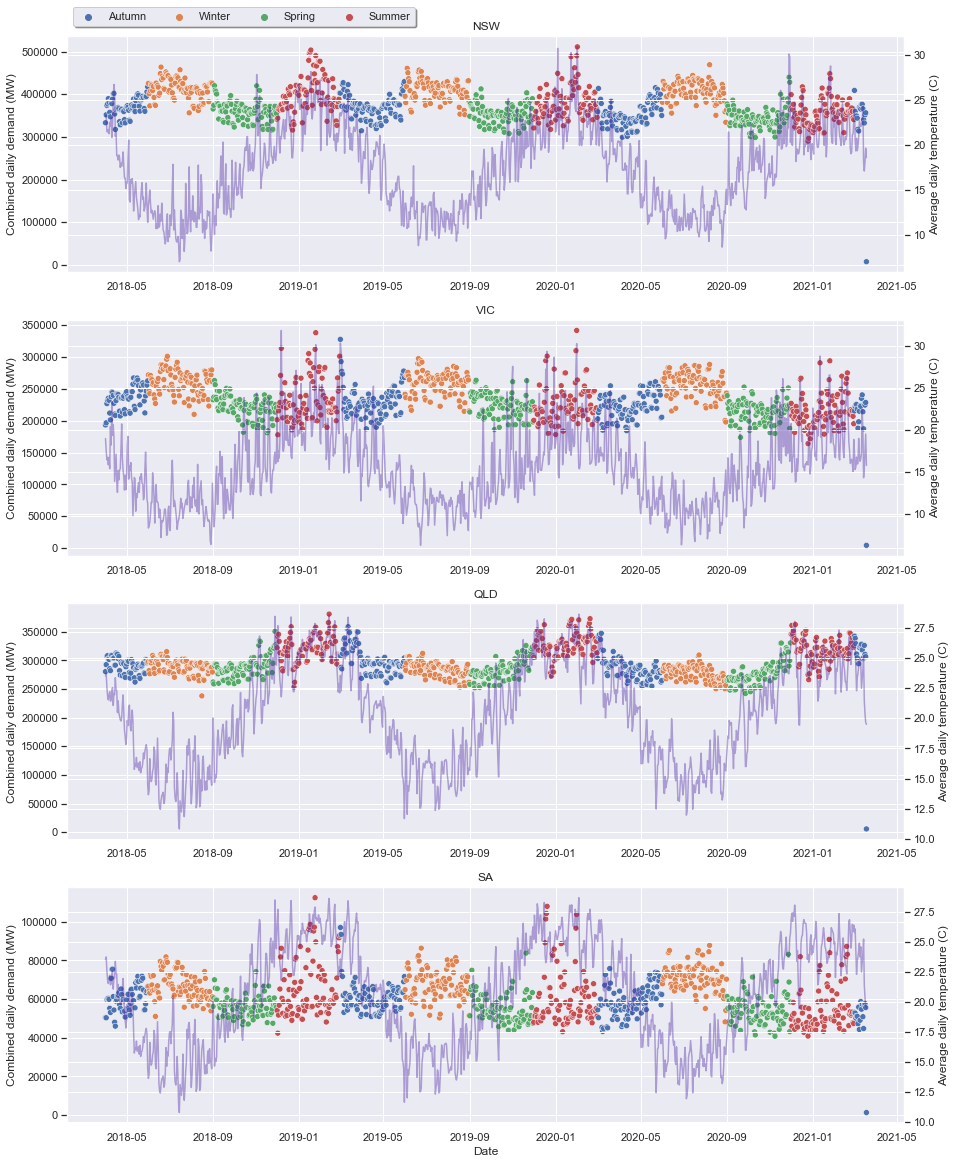

In [31]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes[0],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'NSW'],hue="Season")
ax = plt.twinx(axes[0])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'Average daily temperature (C)', data = df_day2.loc[df_day2['STATE'] == 'NSW'], color='#4c26a6',alpha  = 0.4)
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('Combined daily demand (MW)')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)

sns.scatterplot(ax=axes[1],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'VIC'],hue="Season")
ax = plt.twinx(axes[1])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'Average daily temperature (C)', data = df_day2.loc[df_day2['STATE'] == 'VIC'], color='#4c26a6',alpha  = 0.4)
axes[1].set_title("VIC")
axes[1].set_xlabel('')
axes[1].set_ylabel('Combined daily demand (MW)')
axes[1].legend([],[], frameon=False)


sns.scatterplot(ax=axes[2],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'QLD'],hue="Season")
ax = plt.twinx(axes[2])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'Average daily temperature (C)', data = df_day2.loc[df_day2['STATE'] == 'QLD'], color='#4c26a6',alpha  = 0.4)
axes[2].set_title("QLD")
axes[2].set_xlabel('')
axes[2].set_ylabel('Combined daily demand (MW)')
axes[2].legend([],[], frameon=False)


sns.scatterplot(ax=axes[3],x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'SA'],hue="Season")
ax = plt.twinx(axes[3])
sns.lineplot(ax=ax, x = 'DATETIME', y = 'Average daily temperature (C)', data = df_day2.loc[df_day2['STATE'] == 'SA'], color='#4c26a6',alpha  = 0.4)
axes[3].set_title("SA")
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Combined daily demand (MW)')
axes[3].legend([],[], frameon=False)

plt.savefig(images+'DemandTrendSeason.png',bbox_inches='tight')

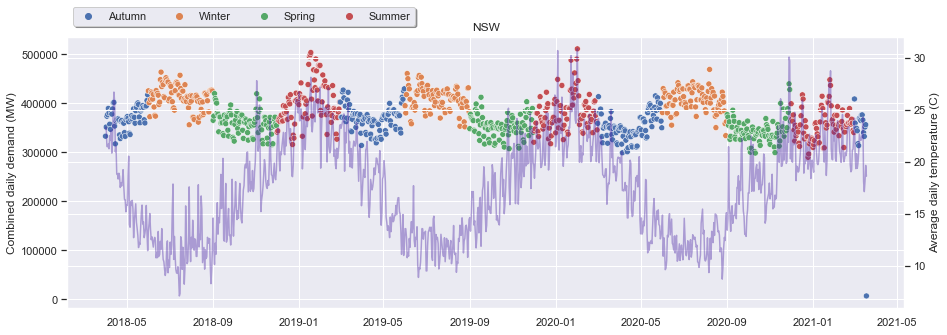

In [87]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes,x = 'DATETIME', y = 'TOTALDEMAND', data = df_day2.loc[df_day2['STATE'] == 'NSW'],hue="Season")
ax = plt.twinx(axes)
sns.lineplot(ax=ax, x = 'DATETIME', y = 'Average daily temperature (C)', data = df_day2.loc[df_day2['STATE'] == 'NSW'], color='#4c26a6',alpha  = 0.4)
axes.set_title("NSW")
axes.set_xlabel('')
axes.set_ylabel('Combined daily demand (MW)')
axes.legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)

plt.savefig(images+'PresentDemandTrendSeason.png',bbox_inches='tight')

In [32]:
df2 = data[['STATE', 'DATETIME', 'TOTALDEMAND', 'POWER', 'FORECASTDEMAND', 'Season','DAYTYPE','HOLIDAY']]
df2['Hour'] = df2["DATETIME"].dt.hour
df2.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_13636/4030526165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hour'] = df2["DATETIME"].dt.hour


,STATE,DATETIME,TOTALDEMAND,POWER,FORECASTDEMAND,Season,DAYTYPE,HOLIDAY,Hour
518448,SA,2018-04-01 00:30:00,1280.36,0.0,1282.589722,Autumn,Night,False,0
518449,SA,2018-04-01 01:00:00,1240.61,0.0,1224.835753,Autumn,Night,False,1
518450,SA,2018-04-01 01:30:00,1159.92,0.0,1138.812838,Autumn,Night,False,1
518451,SA,2018-04-01 02:00:00,1103.37,0.0,1102.078400,Autumn,Night,False,2
518452,SA,2018-04-01 02:30:00,1092.04,0.0,1071.104868,Autumn,Night,False,2


In [33]:
df_hour = df2.groupby(['STATE','Hour','DAYTYPE']).mean().reset_index()

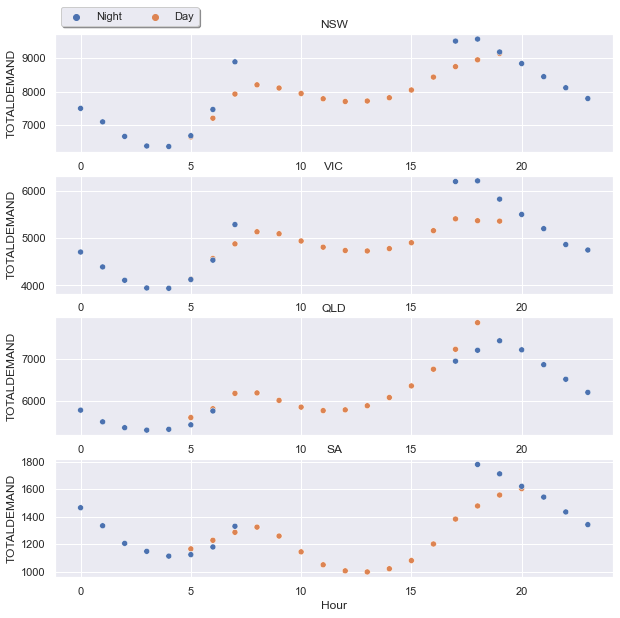

In [34]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes[0],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'NSW'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)


sns.scatterplot(ax=axes[1],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'VIC'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[1].set_title("VIC")
axes[1].set_xlabel('')
axes[1].set_ylabel('TOTALDEMAND')
axes[1].legend([],[], frameon=False)

sns.scatterplot(ax=axes[2],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'QLD'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[2].set_title("QLD")
axes[2].set_xlabel('')
axes[2].set_ylabel('TOTALDEMAND')
axes[2].legend([],[], frameon=False)

sns.scatterplot(ax=axes[3],x = 'Hour', y = 'TOTALDEMAND', data = df_hour.loc[df_hour['STATE'] == 'SA'],hue="DAYTYPE")
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[3].set_title("SA")
axes[3].set_xlabel('Hour')
axes[3].set_ylabel('TOTALDEMAND')
axes[3].legend([],[], frameon=False)

plt.savefig(images+'HourlyDemandTrendAvg.png',bbox_inches='tight')

In [36]:
df_day2['DATETIME'] = pd.to_datetime(df_day2['DATETIME'])
df_day2['WEEKDAY'] = df_day2['DATETIME'].dt.day_name()
df_day2 = df_day2.drop(['Average daily temperature (C)'], axis=1)
df_day2.head()

,STATE,DATETIME,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND,WEEKDAY
0,NSW,2018-04-01,Autumn,True,333125.71,11580.737,336339.742330,Sunday
1,NSW,2018-04-02,Autumn,True,351877.15,9756.556,362228.415477,Monday
2,NSW,2018-04-03,Autumn,False,373863.26,8388.740,377242.581338,Tuesday
3,NSW,2018-04-04,Autumn,False,377322.48,10308.989,380761.820008,Wednesday
4,NSW,2018-04-05,Autumn,False,389764.39,11712.137,390572.764573,Thursday


In [37]:
df_weekday = df_day2.groupby(['STATE','WEEKDAY','Season']).mean().reset_index()
df_weekday['WEEKDAY'] = pd.Categorical(df_weekday['WEEKDAY'],categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df_weekday.head()

,STATE,WEEKDAY,Season,HOLIDAY,TOTALDEMAND,POWER,FORECASTDEMAND
0,NSW,Friday,Autumn,0.054054,372579.039459,14223.270595,372385.298126
1,NSW,Friday,Spring,0.000000,360925.621795,20912.963436,359152.728523
2,NSW,Friday,Summer,0.052632,389489.381053,22671.484605,389240.255531
3,NSW,Friday,Winter,0.000000,417958.404250,11851.418825,416473.123104
4,NSW,Monday,Autumn,0.078947,369895.536053,14863.158447,370032.537086


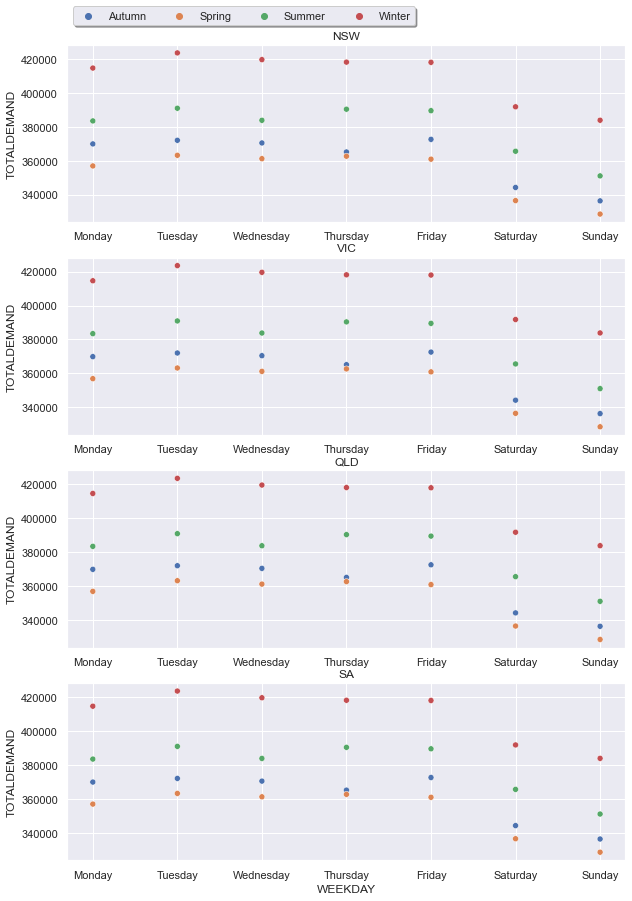

In [38]:
fig, axes = plt.subplots(4, 1, figsize=(10, 15))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.scatterplot(ax=axes[0],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.08), fancybox=True, shadow=True, ncol=5)


sns.scatterplot(ax=axes[1],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[1].set_title("VIC")
axes[1].set_xlabel('')
axes[1].set_ylabel('TOTALDEMAND')
axes[1].legend([],[], frameon=False)

sns.scatterplot(ax=axes[2],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[2].set_title("QLD")
axes[2].set_xlabel('')
axes[2].set_ylabel('TOTALDEMAND')
axes[2].legend([],[], frameon=False)

sns.scatterplot(ax=axes[3],x = 'WEEKDAY', y = 'TOTALDEMAND', data = df_weekday.loc[df_weekday['STATE'] == 'NSW'], hue = 'Season')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
axes[3].set_title("SA")
axes[3].set_xlabel('WEEKDAY')
axes[3].set_ylabel('TOTALDEMAND')
axes[3].legend([],[], frameon=False)

plt.savefig(images+'WeekdayDemandTrendAvg.png',bbox_inches='tight')

In [39]:
tdata.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name,TEMPERATURE
518448,SA,2018-04-01 00:30:00,1280.36,0.0,Adelaide (Kent Town),1282.589722,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,19.9
518449,SA,2018-04-01 01:00:00,1240.61,0.0,Adelaide (Kent Town),1224.835753,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.9
518450,SA,2018-04-01 01:30:00,1159.92,0.0,Adelaide (Kent Town),1138.812838,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,21.0
518451,SA,2018-04-01 02:00:00,1103.37,0.0,Adelaide (Kent Town),1102.078400,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.4
518452,SA,2018-04-01 02:30:00,1092.04,0.0,Adelaide (Kent Town),1071.104868,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.1


In [40]:
df_year = tdata.groupby(['STATE','Year']).sum().reset_index()
df_year

,STATE,Year,TOTALDEMAND,POWER,FORECASTDEMAND,Quarter,Month,Day,HOLIDAY,WeekDayNo,DAYTYPE_no,TEMPERATURE
0,NSW,2018,1.050362e+08,3259156.276,1.048662e+08,39646,105692,208319,383,39594,6744,210812.0
1,NSW,2019,1.395390e+08,5894163.562,1.392865e+08,43968,114336,275424,624,52464,8673,311757.4
2,NSW,2020,1.354453e+08,7527687.820,1.355382e+08,44016,114432,276816,672,52656,8691,306650.2
3,NSW,2021,2.735699e+07,2215199.853,2.722627e+07,3649,6627,50658,96,10947,1594,79073.5
4,QLD,2018,8.047291e+07,4586949.218,8.022262e+07,39646,105692,208319,383,39594,6673,249548.9
5,QLD,2019,1.088672e+08,7597818.731,1.088727e+08,43968,114336,275424,624,52464,8653,366705.6
6,QLD,2020,1.072526e+08,9110338.604,1.069521e+08,44016,114432,276816,720,52656,8675,362406.9
7,QLD,2021,2.395711e+07,2237381.252,2.381913e+07,3649,6627,50658,96,10947,1648,88802.3
8,SA,2018,1.684799e+07,1739951.895,1.675500e+07,39646,105692,208319,288,39594,6732,249548.9
9,SA,2019,2.286356e+07,3055597.166,2.261466e+07,43968,114336,275424,576,52464,8656,366656.1


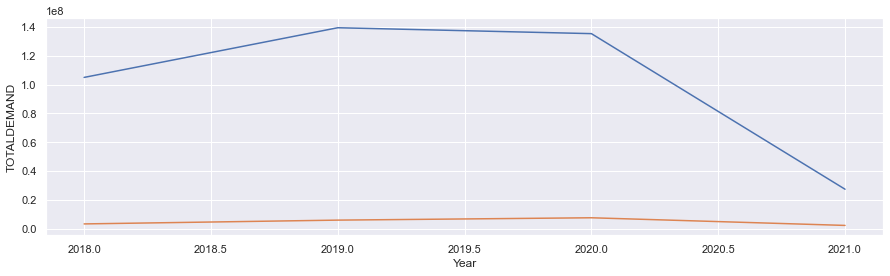

In [41]:
plt.figure(figsize=(15,4))
# fig, axes = plt.subplots(4, 1, figsize=(15, 20))
# fig.suptitle('Box Plot of Various Time Bucket Classification')
sns.lineplot(x = 'Year', y = 'TOTALDEMAND', data = df_year.loc[df_year['STATE'] == 'NSW'])
sns.lineplot(x = 'Year', y = 'POWER', data = df_year.loc[df_year['STATE'] == 'NSW'])
axes[0].set_title("NSW")
axes[0].set_xlabel('')
axes[0].set_ylabel('TOTALDEMAND')
axes[0].legend(loc='lower left', bbox_to_anchor=(0, 1.02), fancybox=True, shadow=True, ncol=5)

In [42]:
data.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name,TEMPERATURE
518448,SA,2018-04-01 00:30:00,1280.36,0.0,Adelaide (Kent Town),1282.589722,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,19.9
518449,SA,2018-04-01 01:00:00,1240.61,0.0,Adelaide (Kent Town),1224.835753,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.9
518450,SA,2018-04-01 01:30:00,1159.92,0.0,Adelaide (Kent Town),1138.812838,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,21.0
518451,SA,2018-04-01 02:00:00,1103.37,0.0,Adelaide (Kent Town),1102.078400,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.4
518452,SA,2018-04-01 02:30:00,1092.04,0.0,Adelaide (Kent Town),1071.104868,Sunday,2,4,Autumn,1,2018,2018-04-01 06:58:00,2018-04-01 18:41:00,Night,False,6,1,April,20.1


In [43]:
df_qld = data.loc[data['STATE'] == 'QLD']

In [44]:
df_qld.head()

,STATE,DATETIME,TOTALDEMAND,POWER,LOCATION,FORECASTDEMAND,Weekday,Quarter,Month,Season,Day,Year,SUNRISE,SUNSET,DAYTYPE,HOLIDAY,WeekDayNo,DAYTYPE_no,Month Name,TEMPERATURE
518496,QLD,2018-04-01 00:30:00,5667.57,0.0,Brisbane Archerfield Airport,5712.360417,Sunday,2,4,Autumn,1,2018,2018-04-01 05:58:00,2018-04-01 17:46:00,Night,True,6,1,April,19.9
518497,QLD,2018-04-01 01:00:00,5510.28,0.0,Brisbane Archerfield Airport,5553.034247,Sunday,2,4,Autumn,1,2018,2018-04-01 05:58:00,2018-04-01 17:46:00,Night,True,6,1,April,20.9
518498,QLD,2018-04-01 01:30:00,5425.29,0.0,Brisbane Archerfield Airport,5429.120946,Sunday,2,4,Autumn,1,2018,2018-04-01 05:58:00,2018-04-01 17:46:00,Night,True,6,1,April,21.0
518499,QLD,2018-04-01 02:00:00,5386.56,0.0,Brisbane Archerfield Airport,5367.317867,Sunday,2,4,Autumn,1,2018,2018-04-01 05:58:00,2018-04-01 17:46:00,Night,True,6,1,April,20.4
518500,QLD,2018-04-01 02:30:00,5356.05,0.0,Brisbane Archerfield Airport,5315.944868,Sunday,2,4,Autumn,1,2018,2018-04-01 05:58:00,2018-04-01 17:46:00,Night,True,6,1,April,20.1


In [45]:
df_temp_qld = df_qld[['DATETIME', 'TEMPERATURE','Season','DAYTYPE']]
df_temp_qld['DATE'] = df_temp_qld["DATETIME"].dt.date
df_temp_qld['DATE'] = pd.to_datetime(df_temp_qld['DATE'])
df_temp_qld['HOUR'] = df_temp_qld["DATETIME"].dt.hour

df_temp_qld.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_13636/3429096651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_qld['DATE'] = df_temp_qld["DATETIME"].dt.date
C:\Users\rahul\AppData\Local\Temp/ipykernel_13636/3429096651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_qld['DATE'] = pd.to_datetime(df_temp_qld['DATE'])
C:\Users\rahul\AppData\Local\Temp/ipykernel_13636/3429096651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,DATETIME,TEMPERATURE,Season,DAYTYPE,DATE,HOUR
518496,2018-04-01 00:30:00,19.9,Autumn,Night,2018-04-01,0
518497,2018-04-01 01:00:00,20.9,Autumn,Night,2018-04-01,1
518498,2018-04-01 01:30:00,21.0,Autumn,Night,2018-04-01,1
518499,2018-04-01 02:00:00,20.4,Autumn,Night,2018-04-01,2
518500,2018-04-01 02:30:00,20.1,Autumn,Night,2018-04-01,2


In [46]:
df_temp_qld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51922 entries, 518496 to 726192
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATETIME     51922 non-null  datetime64[ns]
 1   TEMPERATURE  51922 non-null  float64       
 2   Season       51922 non-null  object        
 3   DAYTYPE      51922 non-null  object        
 4   DATE         51922 non-null  datetime64[ns]
 5   HOUR         51922 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [47]:
test = df_temp_qld[(df_temp_qld['DATE'] == '2018-08-04')]
# test = df_temp_qld[(df_temp_qld['DATE'] == '2018-04-06')]
test

,DATETIME,TEMPERATURE,Season,DAYTYPE,DATE,HOUR
542495,2018-08-04 00:00:00,13.8,Winter,Night,2018-08-04,0
542496,2018-08-04 00:30:00,13.1,Winter,Night,2018-08-04,0
542497,2018-08-04 01:00:00,12.7,Winter,Night,2018-08-04,1
542498,2018-08-04 01:30:00,11.1,Winter,Night,2018-08-04,1
542499,2018-08-04 02:00:00,11.3,Winter,Night,2018-08-04,2
542500,2018-08-04 02:30:00,12.0,Winter,Night,2018-08-04,2
542501,2018-08-04 03:00:00,11.1,Winter,Night,2018-08-04,3
542502,2018-08-04 03:30:00,11.6,Winter,Night,2018-08-04,3
542503,2018-08-04 04:00:00,9.8,Winter,Night,2018-08-04,4
542504,2018-08-04 04:30:00,9.8,Winter,Night,2018-08-04,4


<AxesSubplot:xlabel='DATETIME', ylabel='TEMPERATURE'>

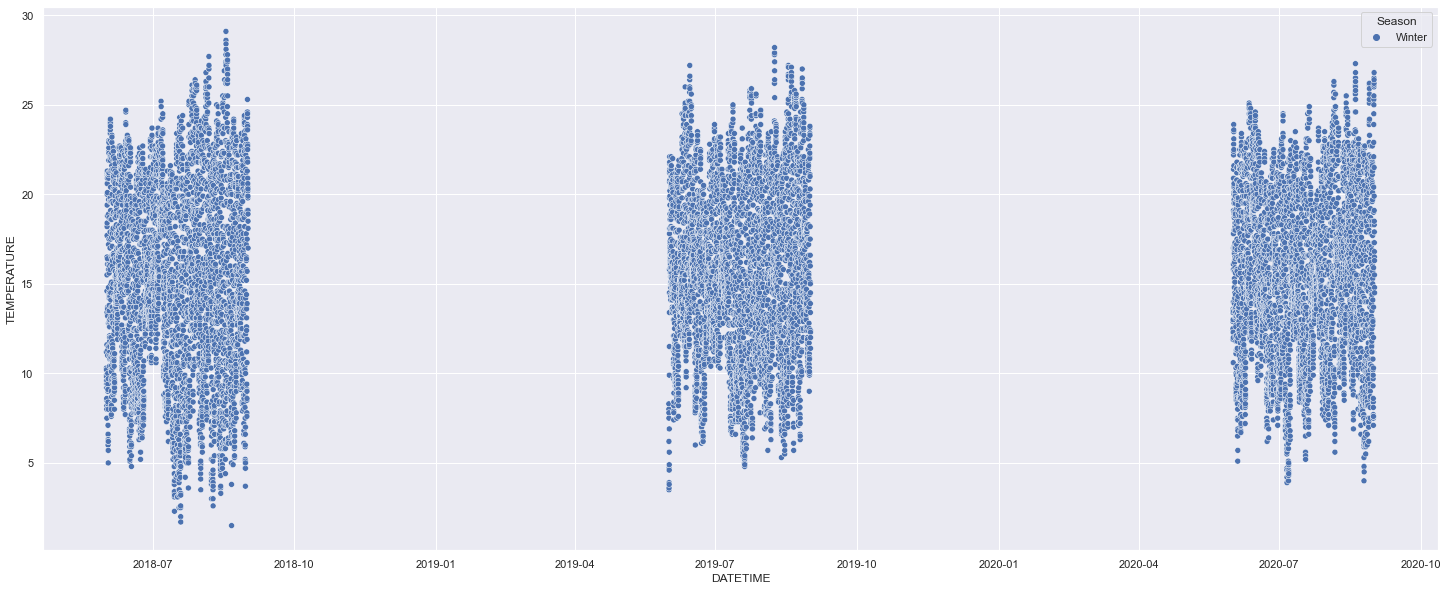

In [48]:
plt.figure(figsize=(25,10))
sns.scatterplot(x = 'DATETIME', y = 'TEMPERATURE', data = df_temp_qld.loc[df_temp_qld['Season'] == 'Winter'], hue = 'Season')

<AxesSubplot:xlabel='HOUR', ylabel='TEMPERATURE'>

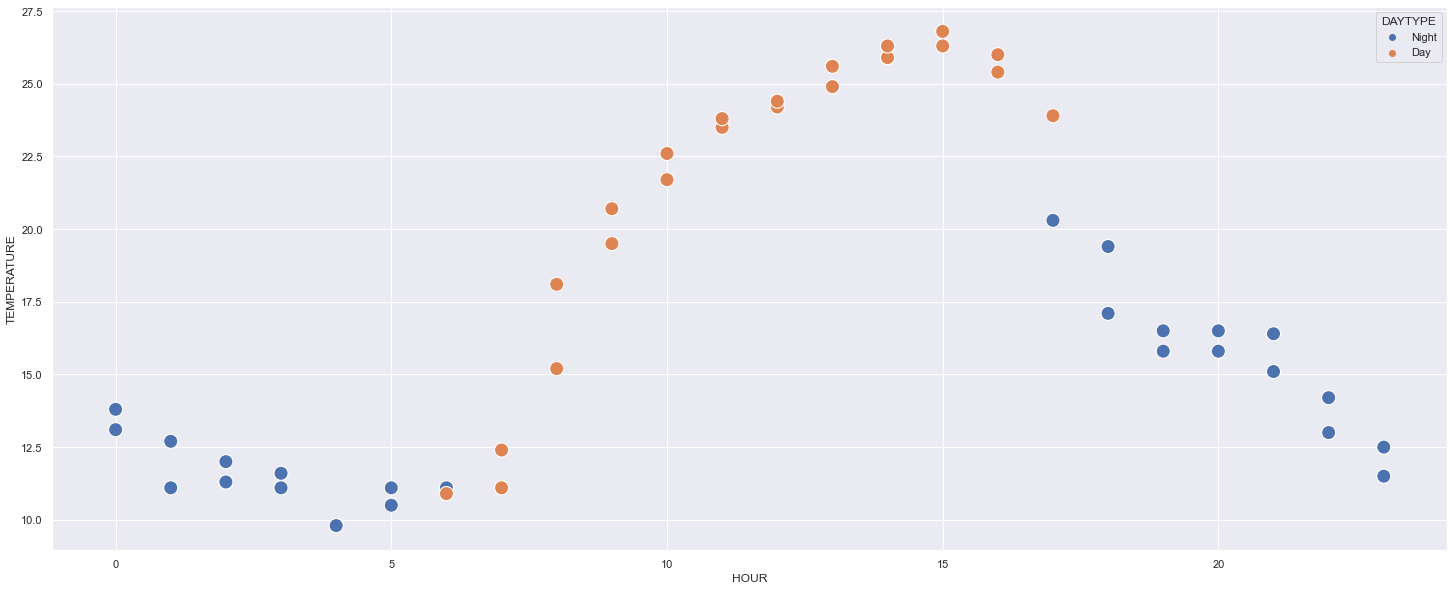

In [49]:
plt.figure(figsize=(25,10))
sns.scatterplot(x = 'HOUR', y = 'TEMPERATURE', data = test, hue = 'DAYTYPE', s=200)

In [50]:
test2= df_temp_qld.groupby(['DATE','Season']).median().reset_index()
# test2= df_temp_qld.groupby(['HOUR','Season']).mean().reset_index()
test2.head(150)

,DATE,Season,TEMPERATURE,HOUR
0,2018-04-01,Autumn,23.30,12.0
1,2018-04-02,Autumn,22.95,11.5
2,2018-04-03,Autumn,21.85,11.5
3,2018-04-04,Autumn,20.75,11.5
4,2018-04-05,Autumn,20.35,11.5
5,2018-04-06,Autumn,21.55,11.5
6,2018-04-07,Autumn,21.00,11.5
7,2018-04-08,Autumn,19.80,11.5
8,2018-04-09,Autumn,21.25,11.5
9,2018-04-10,Autumn,22.40,11.5


<AxesSubplot:xlabel='DATE', ylabel='TEMPERATURE'>

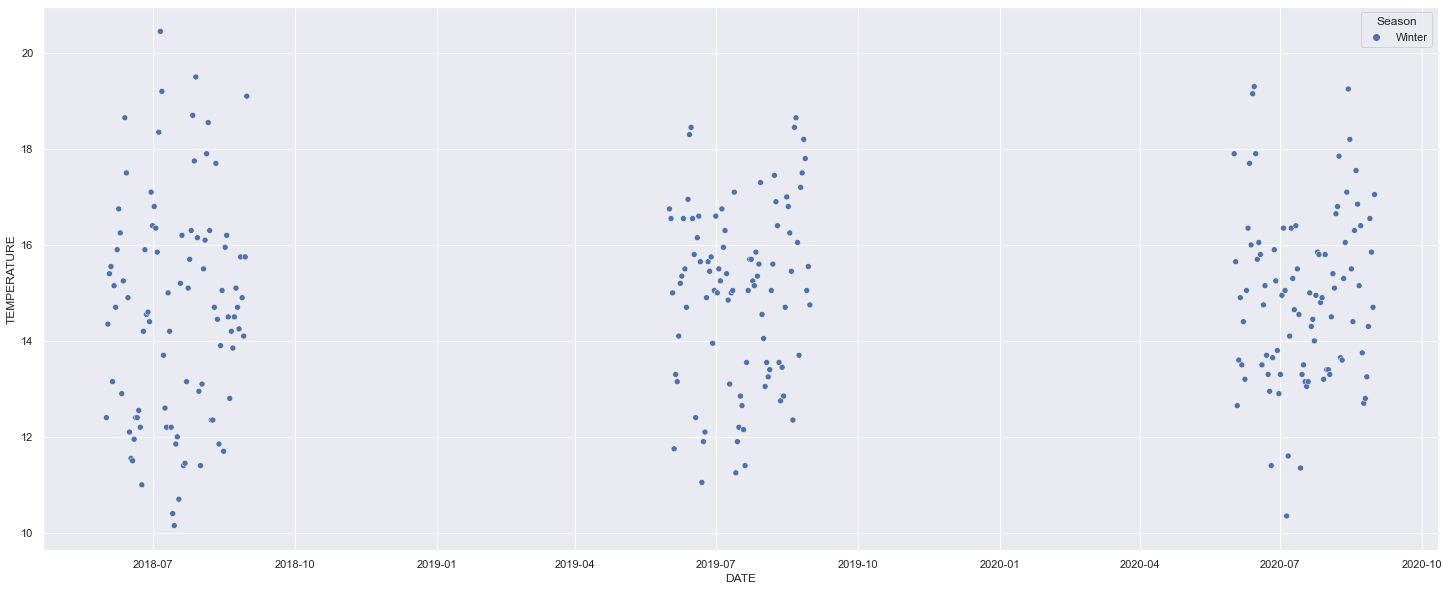

In [51]:
plt.figure(figsize=(25,10))
sns.scatterplot(x = 'DATE', y = 'TEMPERATURE', data = test2.loc[test2['Season'] == 'Winter'], hue = 'Season')

In [52]:
data['HOLIDAY'].value_counts()

False    200563
True       7149
Name: HOLIDAY, dtype: int64

In [53]:
(7614/(204900+7614))*100

3.5828227787345774

In [54]:
data_state = data

<AxesSubplot:xlabel='STATE', ylabel='TOTALDEMAND'>

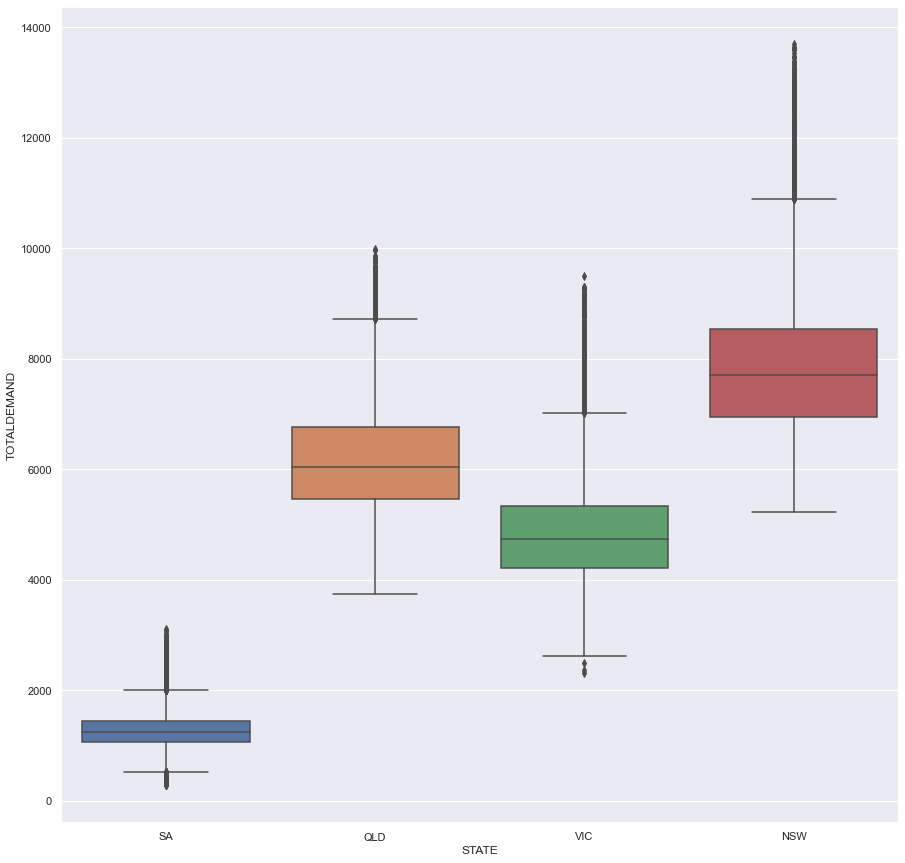

In [55]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data, x=data['STATE'], y='TOTALDEMAND')

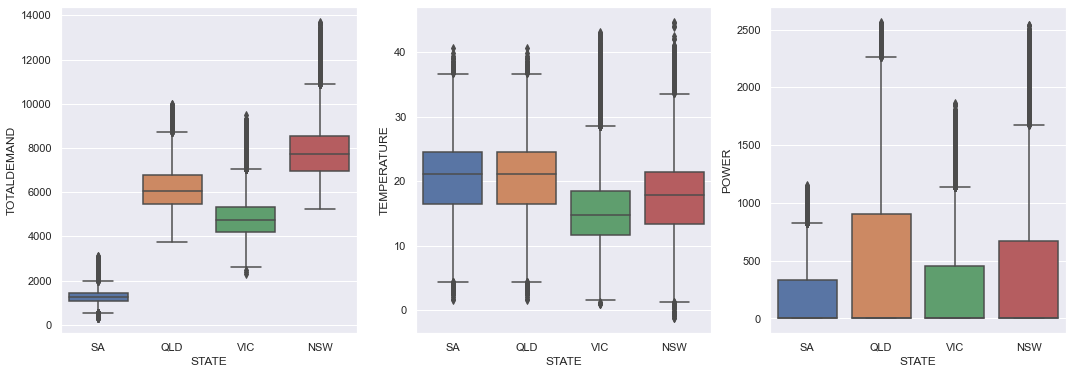

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# fig.suptitle('Main Data Box Plot')

sns.boxplot(ax=axes[0],data=data, x=data['STATE'], y='TOTALDEMAND')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('STATE')
axes[0].set_ylabel('TOTALDEMAND')


sns.boxplot(ax=axes[1],data=data, x=data['STATE'], y='TEMPERATURE')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[1].set_xlabel('STATE')
axes[1].set_ylabel('TEMPERATURE')


sns.boxplot(ax=axes[2],data=data,x=data['STATE'], y='POWER')
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[2].set_xlabel('STATE')
axes[2].set_ylabel('POWER')

# axes.set_ylabel('test2')

plt.savefig(images+'BoxPlots2.png',bbox_inches='tight')

In [57]:
data.groupby(['STATE'])['TOTALDEMAND'].describe().to_csv("tdstat.csv")

In [58]:
data.groupby(['STATE'])['POWER'].describe().to_csv("powerstat.csv")

In [59]:
data.groupby(['STATE'])['TEMPERATURE'].describe().to_csv("tempstat.csv")

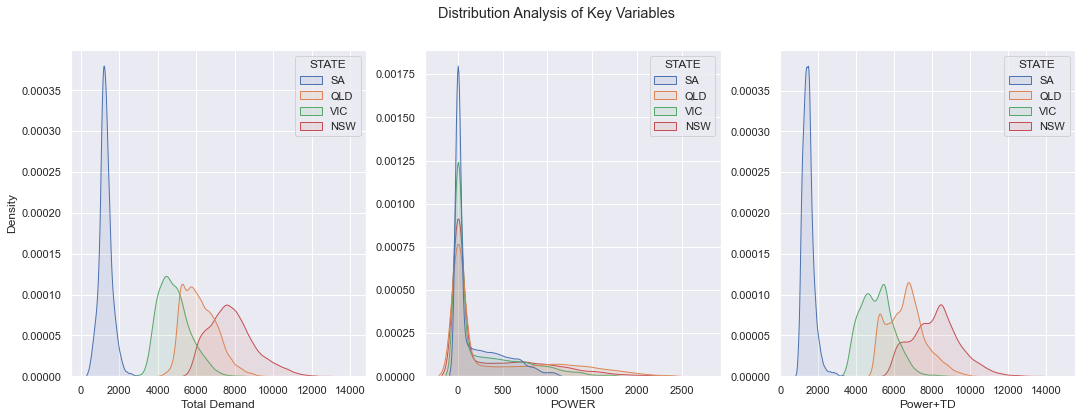

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution Analysis of Key Variables')

# Bulbasaur
sns.kdeplot(ax=axes[0],data=data, x='TOTALDEMAND', hue='STATE', fill=True, alpha=0.1)
# plt.xlabel(ax=axes[0]'Total Demand', fontsize=18)
# axes[0].set_title("Test")
axes[0].set_xlabel('Total Demand')
axes[0].set_ylabel('Density')


# Charmander
sns.kdeplot(ax=axes[1],data=data, x='POWER', hue='STATE', fill=True, alpha=0.1)
# axes[1].set_title("Test2")
axes[1].set_xlabel('POWER')
axes[1].set_ylabel('')

# Squirtle
sns.kdeplot(ax=axes[2],data=data, x=data['POWER']+data['TOTALDEMAND'], hue='STATE', fill=True, alpha=0.1)
# axes[2].set_title("Test3")
axes[2].set_xlabel('Power+TD')
axes[2].set_ylabel('')

# axes.set_ylabel('test2')

plt.savefig(images+'TestDistribution.png',bbox_inches='tight')